In [130]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as mlp
import warnings
warnings.filterwarnings('ignore')

## Q1.Load the data from supplied data file. Remove the observations/samples where the heart diseases are not diagnosed by the Cardiologists. Print the data dimension before and after removing the observations/samples.

In [131]:
# Load the data from the supplied data file
import pandas as pd
hdata = pd.read_csv(r'C:\Users\shane\Desktop\Study\University\T2 2021\SIT720 Assignments\A1_heart_disease_dataset.csv')
pd.DataFrame(hdata)
print(hdata)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0    M  tap     145.0  233.0  yes      2.0    150.0    0.0      2.3   
1    67.0    M  asp     160.0  286.0   no      2.0    108.0    1.0      1.5   
2    67.0    M  asp     120.0  229.0   no      2.0    129.0    1.0      2.6   
3    37.0    M  nap     130.0  250.0   no      0.0    187.0    0.0      3.5   
4    41.0    F  aap     130.0  204.0   no      2.0    172.0    0.0      1.4   
5    56.0    M  aap     120.0  236.0   no      0.0    178.0    0.0      0.8   
6    62.0    F  NaN     140.0  268.0   no      2.0    160.0    0.0      3.6   
7    57.0    F  asp     120.0  354.0   no      0.0    163.0    1.0      0.6   
8    63.0    M  asp     130.0  254.0   no      2.0    147.0    0.0      1.4   
9    53.0    M  asp     140.0  203.0  yes      2.0    155.0    1.0      3.1   
10   57.0    M  asp     140.0  192.0   no      0.0    148.0    0.0      0.4   
11   56.0    F  aap     140.0  294.0   no      2.0  

In [132]:
# Data Demension b4 removing observations 
size=hdata.size
shape=hdata.shape
dfndim=hdata.ndim

print(size)
print(shape)
print(dfndim)

4242
(303, 14)
2


In [133]:
# Removing observations
ohdata=hdata.drop(hdata[hdata.state==0].index)
odata=hdata.drop(hdata[hdata.state==0].index)
print(odata)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
1    67.0    M  asp     160.0  286.0   no      2.0    108.0    1.0      1.5   
2    67.0    M  asp     120.0  229.0   no      2.0    129.0    1.0      2.6   
6    62.0    F  NaN     140.0  268.0   no      2.0    160.0    0.0      3.6   
8    63.0    M  asp     130.0  254.0   no      2.0    147.0    0.0      1.4   
9    53.0    M  asp     140.0  203.0  yes      2.0    155.0    1.0      3.1   
12   56.0    M  nap     130.0  256.0  yes      2.0    142.0    1.0      0.6   
16    NaN  NaN  NaN       NaN    NaN  NaN      NaN      NaN    NaN      NaN   
22   58.0    M  aap     120.0  284.0   no      2.0    160.0    0.0      1.8   
23   58.0    M  nap     132.0  224.0   no      2.0    173.0    0.0      3.2   
24   60.0    M  asp     130.0  206.0   no      2.0    132.0    1.0      2.4   
29   40.0    M  asp     110.0  167.0   no      2.0    114.0    1.0      2.0   
31   60.0    M  asp     117.0  230.0  yes      0.0  

In [134]:
# Data Demension after removing observations to confirm our changes occurred.  
size=ohdata.size
shape=ohdata.shape
dfndim=ohdata.ndim

print(size)
print(shape)
print(dfndim)

2002
(143, 14)
2


------------------------------

## Q2. Continue from question 1. Display the number of rows and their indices that have missing data in one or more cells. Now, replace the missing data by the lowest value of the corresponding feature if it is acontinuous variable. In case of categorical variable, remove the sample. Print the median values of all features before and after replacing missing data.

In [135]:
# Display Number of Rows and Indices for data with one or more cells missing before replacement.
nhdata = ohdata[ohdata.isnull().any(axis=1)]
print(nhdata)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
6    62.0    F  NaN     140.0  268.0   no      2.0    160.0    0.0      3.6   
16    NaN  NaN  NaN       NaN    NaN  NaN      NaN      NaN    NaN      NaN   
55    NaN  NaN  NaN       NaN    NaN  NaN      NaN      NaN    NaN      NaN   
67   54.0    M  nap     150.0  232.0   no      2.0    165.0    0.0      1.6   
114   NaN  NaN  NaN       NaN    NaN  NaN      NaN      NaN    NaN      NaN   
165  57.0    M  asp     132.0  207.0   no      0.0    168.0    1.0      0.0   
187   NaN  NaN  NaN       NaN    NaN  NaN      NaN      NaN    NaN      NaN   
201   NaN  NaN  NaN       NaN    NaN  NaN      NaN      NaN    NaN      NaN   
212   NaN  NaN  NaN       NaN    NaN  NaN      NaN      NaN    NaN      NaN   
213   NaN  NaN  NaN       NaN    NaN  NaN      NaN      NaN    NaN      NaN   
223  53.0    M  asp     123.0  282.0   no      0.0     95.0    1.0      2.0   
228  54.0    M  asp     110.0    NaN   no      2.0  

In [136]:
# Median of data with missing rows before replacement.
print(ohdata.dtypes)
nmedian=ohdata.median(axis=0)
print(nmedian)

age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
state       float64
dtype: object
age          58.0
trestbps    132.0
chol        251.0
restecg       2.0
thalach     142.0
exang         1.0
oldpeak       1.4
slope         2.0
ca            1.0
thal          7.0
state         2.0
dtype: float64


In [137]:
#Removing rows with missing categorical data.
fdata=ohdata
fdata.dropna(subset=["sex"],inplace=True)
fdata.dropna(subset=["cp"],inplace=True)
print(fdata)

      age sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
1    67.0   M  asp     160.0  286.0   no      2.0    108.0    1.0      1.5   
2    67.0   M  asp     120.0  229.0   no      2.0    129.0    1.0      2.6   
8    63.0   M  asp     130.0  254.0   no      2.0    147.0    0.0      1.4   
9    53.0   M  asp     140.0  203.0  yes      2.0    155.0    1.0      3.1   
12   56.0   M  nap     130.0  256.0  yes      2.0    142.0    1.0      0.6   
22   58.0   M  aap     120.0  284.0   no      2.0    160.0    0.0      1.8   
23   58.0   M  nap     132.0  224.0   no      2.0    173.0    0.0      3.2   
24   60.0   M  asp     130.0  206.0   no      2.0    132.0    1.0      2.4   
29   40.0   M  asp     110.0  167.0   no      2.0    114.0    1.0      2.0   
31   60.0   M  asp     117.0  230.0  yes      0.0    160.0    1.0      1.4   
32   64.0   M  nap     140.0  335.0   no      0.0    158.0    0.0      0.0   
36   43.0   M  asp     120.0  177.0   no      2.0    120.0    1.

In [138]:
# Replace Continuous Values with lowest column value.
fdata['age'].fillna(value=fdata['age'].min(),inplace=True)
fdata['trestbps'].fillna(value=fdata['trestbps'].min(),inplace=True)
fdata['chol'].fillna(value=fdata['chol'].min(),inplace=True)
fdata['restecg'].fillna(value=fdata['restecg'].min(),inplace=True)
fdata['thalach'].fillna(value=fdata['thalach'].min(),inplace=True)
fdata['exang'].fillna(value=fdata['exang'].min(),inplace=True)
fdata['oldpeak'].fillna(value=fdata['oldpeak'].min(),inplace=True)
fdata['slope'].fillna(value=fdata['slope'].min(),inplace=True)
fdata['ca'].fillna(value=fdata['ca'].min(),inplace=True)
fdata['thal'].fillna(value=fdata['thal'].min(),inplace=True)
fdata['state'].fillna(value=fdata['state'].min(),inplace=True)
print(fdata)

      age sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
1    67.0   M  asp     160.0  286.0   no      2.0    108.0    1.0      1.5   
2    67.0   M  asp     120.0  229.0   no      2.0    129.0    1.0      2.6   
8    63.0   M  asp     130.0  254.0   no      2.0    147.0    0.0      1.4   
9    53.0   M  asp     140.0  203.0  yes      2.0    155.0    1.0      3.1   
12   56.0   M  nap     130.0  256.0  yes      2.0    142.0    1.0      0.6   
22   58.0   M  aap     120.0  284.0   no      2.0    160.0    0.0      1.8   
23   58.0   M  nap     132.0  224.0   no      2.0    173.0    0.0      3.2   
24   60.0   M  asp     130.0  206.0   no      2.0    132.0    1.0      2.4   
29   40.0   M  asp     110.0  167.0   no      2.0    114.0    1.0      2.0   
31   60.0   M  asp     117.0  230.0  yes      0.0    160.0    1.0      1.4   
32   64.0   M  nap     140.0  335.0   no      0.0    158.0    0.0      0.0   
36   43.0   M  asp     120.0  177.0   no      2.0    120.0    1.

In [139]:
# Median of data with no missing rows after replacement.
fmedian=fdata.median(axis=0)
print(fmedian)

age          58.0
trestbps    131.0
chol        249.0
restecg       2.0
thalach     142.0
exang         1.0
oldpeak       1.4
slope         2.0
ca            1.0
thal          7.0
state         2.0
dtype: float64


In [140]:
# Median of Old Dataframe (ohdata via nmedian) vs. New Dataframe (fdata via fmedian)
print(nmedian)
print(fmedian)

age          58.0
trestbps    132.0
chol        251.0
restecg       2.0
thalach     142.0
exang         1.0
oldpeak       1.4
slope         2.0
ca            1.0
thal          7.0
state         2.0
dtype: float64
age          58.0
trestbps    131.0
chol        249.0
restecg       2.0
thalach     142.0
exang         1.0
oldpeak       1.4
slope         2.0
ca            1.0
thal          7.0
state         2.0
dtype: float64


--------------------------------

## Q3. Continue from question 2. Is there any change in data type? If yes, convert them back to appropriate data types. Print all variables with corresponding data type. 

In [141]:
# Print data types for both Old Dataframe (ohdata) vs. New Dataframe (fdata). 
# There is no changes in data types pre and post data manipulation.
print(ohdata.dtypes)

age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
state       float64
dtype: object


In [142]:
# The data types from the old dataframe match the new dataframe.
print(fdata.dtypes)

age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
state       float64
dtype: object


----------------------------------------

## Q4. Continue from question 3. Print the total numbers and ration of male and female patients who are at highest risk of heart disease. 

In [143]:
# Total Number of paitients who have the highest risk (4) of Heart Disease. 
fdata[fdata.state == 4].shape

(13, 14)

In [144]:
# Total Number and Ratio of Males vs Females paitients who have the highest risk (4) of Heart Disease.

# This code calculates the number of males with the highest risk of heart disease. 
maledata=fdata[fdata.sex == 'M']
xmale=maledata.drop(maledata[maledata.state!=4.0].index) 
print(len(xmale))

# This code calculates the number of females with the highest risk of heart disease. 
femdata=fdata[fdata.sex == 'F']
xfem=femdata.drop(femdata[femdata.state!=4.0].index) 
print(len(xfem))

11
2


In [145]:
# Here we calculate the ratio between male and female patients. 
r = len(xmale)/len(xfem)
r2 = len(xfem)/len(xfem)
print("The ratio betwen men and women who are at the highest risk of heart disease is", r,":",r2, "or 5.5 men for every 1 female.")

The ratio betwen men and women who are at the highest risk of heart disease is 5.5 : 1.0 or 5.5 men for every 1 female.


---------------------------------------

## Q5. Continue from question 3. Is there any association between heart rate and severity of heart disease? Explain your results from given dataset.

[[533.03450791  -1.00892156]
 [ -1.00892156   1.05336101]]
[[ 1.         -0.04257857]
 [-0.04257857  1.        ]]


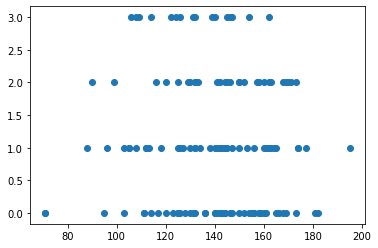

In [146]:
# Here I select the data for analysis.
hratedata = fdata.loc[:,"thalach"]
slopedata = fdata.loc[:,"ca"]

# Here I calculate the covaraince of the data.
covi=np.cov(hratedata,slopedata)
print(covi)
# Here I calculate the correlation coefficient of the data.
corr=np.corrcoef(hratedata,slopedata)

print(corr)
# Here I graph the data.
mlp.scatter(hratedata,slopedata)
mlp.show()

* Based on the covariance matrix, there seems to be a strong negative correlation between the heart rate and severity of heart disease, our value of -1 suggests that there is no predictive relationship between the two variables. 
* Based on the correlation matrix, a negative correlation describes the extent to which two variables move in opposite directions in our example above, the value is -0.04257857 which implies a negative weak negative correlation, supporting the idea that the two variables do not have a predictive relationship. 
* Based on our scatter plot, we compare maximum heart rate to blocked vessels (or severity of disease). The scatter plot shows the range of values plotted against the vertical axis of the number of blocked vessels. From the graph, we can see that as the number of blocked vessels increases, the range of our blood pressure values decreases, implying that there is more variation in readings at lower numbers of blocked vessels. We recorded our maximum values at one blocked vessel, and we record our minimum values at no blocked vessels. Even if these values are outliers, every other group aside from the highest level of risk has greater maximum heart rate values. 

* The scatter plot and matrices show that there is no strong relationship between heart rate and severity of disease, based on the provided data.  


---------------------------------------------------------

## Q.6. Continue from question 3. Print the average cholesterol level for different number of blocked blood vessels across gender. Please report the pattern found in the result, if any.

In [147]:
# Print the average cholesterol level for different number of blocked blood vessels across gender.
cholesdata=fdata[["sex","chol","ca"]]
cholesdata.groupby(['sex','ca']).mean()

chol
sex ca             
F   0.0  284.600000
    1.0  220.500000
    2.0  294.666667
    3.0  272.500000
M   0.0  242.538462
    1.0  243.000000
    2.0  243.727273
    3.0  271.916667

* There is a stable pattern in the male values below three blocked vessels. 
* The Female average dips at one blocked vessel and significantly elevated at all other vessels. 
* There seems to be no significant pattern in the above data frame. 

----------------------------------------------------

## Q7. Print the percentage of patients at risk of heart disease having abnormality in both ECG and blood sugar with asymptomatic chest pain

In [148]:
# Here we need to reduce the table down to the conditions that we need. 
# cp = asp , fbs = yes , restecg <0 , state <0.
abnorb=fdata[["cp","fbs","restecg","state"]]
abnorb=abnorb.drop(abnorb[abnorb.state <0].index)
abnorb=abnorb.drop(abnorb[abnorb.restecg == 0].index) 
abnorb=abnorb[(abnorb.cp.str.contains('asp')) & (abnorb.fbs.str.contains('yes'))]
print(abnorb)

      cp  fbs  restecg  state
9    asp  yes      2.0    1.0
111  asp  yes      2.0    1.0
113  asp  yes      2.0    2.0
118  asp  yes      2.0    3.0
120  asp  yes      2.0    3.0
126  asp  yes      2.0    3.0
146  asp  yes      2.0    4.0
192  asp  yes      2.0    1.0
236  asp  yes      2.0    2.0
286  asp  yes      2.0    2.0
296  asp  yes      2.0    3.0


In [149]:
# Here we calculate the length or size of the original dataset and the new dataset based on our conditions, in order to deduce the percentage. 
x = len(fdata.index)
y = len(abnorb)

# Finally, we calculate the percentage.  
z = y / x * 100
print("The percenatge of patients at risk of heart disease that have abnormalities in ECG and their Blood records is", z, "percent.")

The percenatge of patients at risk of heart disease that have abnormalities in ECG and their Blood records is 8.208955223880597 percent.


----------------------------

 ## Q8. Calculate and print the average blood pressure of all observations with non-flat ST slopes of ECG

In [150]:
# We make our new dataset conditions and drop rows that don't need conditions. 
stdata = fdata[["trestbps","slope"]]
stdata = stdata.drop(stdata[stdata.slope == 2].index)

# Here we calculate the mean of the column. 
tmean=stdata["trestbps"].mean()
print("The average blood pressure of all observations with non-flat ST slopes of ECG is:", tmean)

The average blood pressure of all observations with non-flat ST slopes of ECG is: 134.14583333333334


------------------------------------------------

## Q9. Create and print a dataframe of the heart rate, blood pressure and cholesterol levels for different age groups (based on 10 years interval).

In [151]:
# Here we create a dataframe by using bins, based on our range of 10 years to create a new dataframe. 
tendata = fdata[["age","thalach","trestbps","chol","sex"]]
tendata['age_interval'] = pd.cut(tendata['age'],bins=range(0,101,10),labels=[f'{l}-{l+10}' for l in range(0,100,10)])
tendata.groupby(['age_interval'])['thalach','trestbps','chol'].mean()

,thalach,trestbps,chol
age_interval,,,
0-10,NaN,NaN,NaN
10-20,NaN,NaN,NaN
20-30,NaN,NaN,NaN
30-40,150.500000,124.333333,220.000000
40-50,141.545455,126.272727,242.409091
50-60,141.106061,137.727273,254.878788
60-70,132.948718,135.282051,254.538462
70-80,162.000000,125.000000,304.000000
80-90,NaN,NaN,NaN


----------------------------------------------------

## Q.10 Continue from question 3. Find the average cholesterol level of across gender for each age group. Please explain the results.

In [152]:
# Here we create a dataframe by using bins, based on our range of 10 years to create a new dataframe but we further catergorise based on the 'sex' column.
avdata=fdata[["age","sex","chol"]]
avdata['age_interval'] = pd.cut(avdata['age'],bins=range(0,101,10),labels=[f'{l}-{l+10}' for l in range(0,100,10)])
avdata.groupby(['age_interval','sex'])[["chol"]].mean()

chol
age_interval sex            
0-10         F           NaN
             M           NaN
10-20        F           NaN
             M           NaN
20-30        F           NaN
             M           NaN
30-40        F           NaN
             M    220.000000
40-50        F    341.000000
             M    237.714286
50-60        F    280.583333
             M    249.166667
60-70        F    270.777778
             M    249.666667
70-80        F           NaN
             M    304.000000
80-90        F           NaN
             M           NaN
90-100       F           NaN
             M           NaN

----------------------------------------------

## Q11. Continue from question 3. Draw two scatter plots of cholesterol level, one against blood pressure and another against heart rate. Draw them in two subplots of the same plot. 

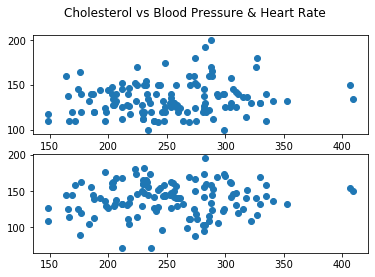

In [153]:
# Here we create subplots.
fig, axs = mlp.subplots(2)

# We plot our data on each subplot. 
fig.suptitle('Cholesterol vs Blood Pressure & Heart Rate')
axs[0].scatter(fdata.chol, fdata.trestbps)
axs[1].scatter(fdata.chol, fdata.thalach);

-----------------------------------------------------

## Q12. Visualize the cholesterol level against number of blood vessel blocked for male and female using line plot. Explain the graph base on your observation.

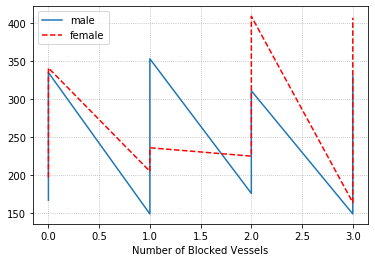

In [154]:
# Here we create two datasets, spliting them based on our boolean condition.
mbd, fbd = [x for _,x in ohdata.groupby(fdata['sex'] == 'F')]

# Here we sort the values of both datasets, by the fields we want to compare.
mbd = mbd[["chol","ca"]]
mbd = mbd.sort_values(["ca","chol"],ascending=True)

fbd = fbd[["chol","ca"]]
fbd = fbd.sort_values(["ca","chol"],ascending=True)

# We plot our two datasets against each other. 
mlp.plot(mbd.ca,mbd.chol,ls='-')
mlp.plot(fbd.ca,fbd.chol,ls='--',c='r')
mlp.grid(True,linestyle=':')
mlp.xlabel('Number of Blocked Vessels')
mlp.legend(["male","female"],loc=2);

* Males range of cholesterol levels is largest at one blocked vessel. 
* Females range of cholesterol levels is largest at three blocked vessels.

* Males range of cholesterol levels is smallest at two blocked vessels. 
* Females range of cholesterol levels is smallest at one blocked vessel.

* Males have their maximum cholesterol levels with one blocked vessel, with three-vessel levels a close second.
* Females have their maximum cholesterol levels with three blocked vessels, with three-vessel levels a close second.

* Males have their minimum cholesterol levels with one blocked vessel, with three-vessel levels at similar levels.
* Females have their minimum cholesterol levels with three blocked vessels.

* Females have the highest cholesterol readings across 3 of the four levels of blocked vessels. 
* Males have the highest cholesterol readings across only 1 of the four levels of blocked vessels. 

* Conclusion: Males are at higher risk when they have 1 or 3 blocked vessels, whereas females are at higher risk when they have two or more blocked vessels if we use cholesterol levels as an indicator of disease risk. 
* Conclusion: According to medical practitioners, cholesterol levels at or above 240mg present a sharp risk increase. In this scenario, females in more groups met or exceeded those values than males. 

----------------------------------------------

## Q13. Draw a group bar diagram of heart rate, blood pressure and total number of patients, based on age groups defined in question 9. Explain your observation from the graph.

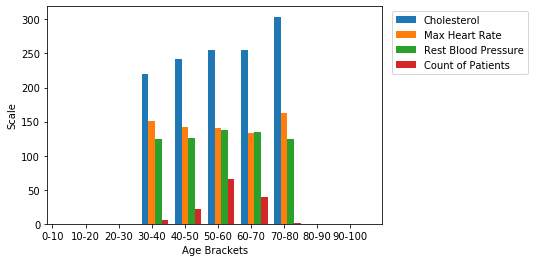

In [155]:
# We create our dataframe.
xdata = fdata[['age','chol','thalach','trestbps']]
xdata['age_interval'] = pd.cut(xdata['age'],bins=range(0,101,10),labels=[f'{l}-{l+10}' for l in range(0,100,10)])

# We turn our new dataframe into an indexed table to extract data. 
xgroup=xdata.groupby(['age_interval'])[["chol","thalach",'trestbps']].agg(['count','mean'])
xgroup=xgroup.reset_index()
xgroup=xgroup.transpose()

# We create our variables from the indexed table, in order to plot the dataset.
x = np.arange(10)
x4 = [xgroup.iat[1,0],xgroup.iat[1,1],xgroup.iat[1,2],xgroup.iat[1,3],xgroup.iat[1,4],xgroup.iat[1,5],xgroup.iat[1,6],xgroup.iat[1,7],xgroup.iat[1,8],xgroup.iat[1,9]]
x1 = [xgroup.iat[2,0],xgroup.iat[2,1],xgroup.iat[2,2],xgroup.iat[2,3],xgroup.iat[2,4],xgroup.iat[2,5],xgroup.iat[2,6],xgroup.iat[2,7],xgroup.iat[2,8],xgroup.iat[2,9]]
x2 = [xgroup.iat[4,0],xgroup.iat[4,1],xgroup.iat[4,2],xgroup.iat[4,3],xgroup.iat[4,4],xgroup.iat[4,5],xgroup.iat[4,6],xgroup.iat[4,7],xgroup.iat[4,8],xgroup.iat[4,9]]
x3 = [xgroup.iat[6,0],xgroup.iat[6,1],xgroup.iat[6,2],xgroup.iat[6,3],xgroup.iat[6,4],xgroup.iat[6,5],xgroup.iat[6,6],xgroup.iat[6,7],xgroup.iat[6,8],xgroup.iat[6,9]]
width = 0.2

# We convert our variables to array. 
x4 = np.asarray(x4)
x1 = np.asarray(x1)
x2 = np.asarray(x2)
x3 = np.asarray(x3)

# We plot our data and apply the labels nessecary. 
mlp.bar(x-0.2,height=x1,data=x1,width=width)
mlp.bar(x,height=x2,data=x2,width=width)
mlp.bar(x+0.2,height=x3,data=x3,width=width)
mlp.bar(x+(0.2*2),height=x4,data=x4,width=width)
mlp.xticks(x,['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])
mlp.yticks([0,200,50,100,250,150,300])
mlp.xlabel('Age Brackets')
mlp.ylabel('Scale')
mlp.legend(["Cholesterol","Max Heart Rate","Rest Blood Pressure","Count of Patients"],bbox_to_anchor=(1.45, 1),loc=1)
mlp.show();

* Cholesterol levels increased almost exponentially with age. 
* Max heart rate seems to flatten during middle age.  
* Blood pressure seems to peak at middle age, almost in a bell curve like fashion. 
* Blood pressure reaches its peak at 70-80 and almost matches it at 30-40.
* Most patients fall into the 50-60 bracket. 
* Because most patients are in the 50-60 bracket, the values between each statistic vary less widely than patients at lower and higher ages. 
* The 70-80 bracket has a low number of patients (1 in this case), making their average-based data act more like an outlier. 

----------------------------------------

## Q14.Continue from question 9. Add two more columns named [‘num_male_patients’, ‘num_female_patients’] and having values of the number of male and female patients affected by heart disease in each age group respectively. Save the combined dataset to a csv file named ‘age_group_stat.csv’ in the same directory of your code file. 

In [156]:
# Here we create multiple dataframes with values we want to play with.
tendata['age_interval'] = pd.cut(tendata['age'],bins=range(0,100,10),labels=[f'{l}-{l+10}' for l in range(0,90,10)])
xgroup = tendata.groupby(['age_interval'])['thalach','trestbps','chol'].agg(['count','mean'])
ygroup = tendata.groupby(['age_interval'])['thalach','trestbps','chol'].mean()
zgroup = tendata.groupby(['age_interval',"sex"])['thalach','trestbps','chol'].count()

# The dataframes are converted into indexed table for data extraction. 
zgroup = zgroup.reset_index()
xgroup = xgroup.reset_index()

# We add the columns to our final table.
ygroup.insert(3,"num_male_patients",0)
ygroup.insert(4,"num_female_patients",0)

# We turn values from our summary table (xgroup) into variables.
m34 = zgroup.iat[7,2]
m45 = zgroup.iat[9,2]
m56 = zgroup.iat[11,2]
m67 = zgroup.iat[13,2]
m78 = zgroup.iat[15,2]

f45 = zgroup.iat[8,2]
f56 = zgroup.iat[10,2]
f67 = zgroup.iat[12,2]

# We plug our extracted variables into our final table. 
ygroup.iloc[3,3]=m34  
ygroup.iloc[4,3]=m45
ygroup.iloc[5,3]=m56
ygroup.iloc[6,3]=m67
ygroup.iloc[7,3]=m78

ygroup.iloc[4,4]=f45  
ygroup.iloc[5,4]=f56
ygroup.iloc[6,4]=f67

# Finally we convert our updated dataframe into a csv file. 
ygroup.to_csv(r'C:\Users\shane\Desktop\Study\University\T2 2021\SIT720 Assignments\age_group_stat.csv', index = False)
ygroup

,thalach,trestbps,chol,num_male_patients,num_female_patients
age_interval,,,,,
0-10,NaN,NaN,NaN,0.0,0.0
10-20,NaN,NaN,NaN,0.0,0.0
20-30,NaN,NaN,NaN,0.0,0.0
30-40,150.500000,124.333333,220.000000,6.0,0.0
40-50,141.545455,126.272727,242.409091,21.0,1.0
50-60,141.106061,137.727273,254.878788,54.0,12.0
60-70,132.948718,135.282051,254.538462,30.0,9.0
70-80,162.000000,125.000000,304.000000,1.0,0.0
80-90,NaN,NaN,NaN,0.0,0.0


------------------------------------

## Q15.  Continue from question 1. Replace all the rows where the ‘state’ is null with its immediate previous row. Finally, display and save the resultant dataset to a csv file named ‘clean_data.csv’ in the same directory of your code file. 

In [157]:
# Here bfill fills the nan value with the previous row value.
xdata=ohdata.fillna(method='bfill')

# We write the dataframe to a csv file. 
xdata.to_csv(r'C:\Users\shane\Desktop\Study\University\T2 2021\SIT720 Assignments\clean_data.csv', index = False)

xdata

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state
1,67.0,M,asp,160.0,286.0,no,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,M,asp,120.0,229.0,no,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
8,63.0,M,asp,130.0,254.0,no,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2.0
9,53.0,M,asp,140.0,203.0,yes,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1.0
12,56.0,M,nap,130.0,256.0,yes,2.0,142.0,1.0,0.6,2.0,1.0,6.0,2.0
22,58.0,M,aap,120.0,284.0,no,2.0,160.0,0.0,1.8,2.0,0.0,3.0,1.0
23,58.0,M,nap,132.0,224.0,no,2.0,173.0,0.0,3.2,1.0,2.0,7.0,3.0
24,60.0,M,asp,130.0,206.0,no,2.0,132.0,1.0,2.4,2.0,2.0,7.0,4.0
29,40.0,M,asp,110.0,167.0,no,2.0,114.0,1.0,2.0,2.0,0.0,7.0,3.0
31,60.0,M,asp,117.0,230.0,yes,0.0,160.0,1.0,1.4,1.0,2.0,7.0,2.0
